In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, accuracy_score

In [190]:
train = pd.read_csv('./data/backfilled_data.csv')
test = pd.read_csv('./data/backfilled_test.csv')

train.head(10)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,Ekiti,Benue,Car Vintage,0
1,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0
2,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0
3,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,Ajah,Lagos,Car Vintage,0
4,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,Ajah,Lagos,CVTP,0
5,ID_W0VIHSI,2006-03-24,2011-04-28,Male,45.0,2006-03-24,1,Saloon,Gold,Mack,Warri North,Warri-North,CVTP,0
6,ID_DC8ITK4,2006-07-06,2016-09-06,Male,39.0,2006-07-06,3,Saloon,Gold,TOYOTA,Eti-Osa,Eti-Osa,Car Vintage,0
7,ID_2SWIGKH,2007-03-04,2037-08-03,Male,37.0,2007-03-04,1,Saloon,Gold,TOYOTA,Bekwara,Benue,CarSafe,0
8,ID_6BJMPUY,2009-02-26,2016-06-25,Male,37.0,2009-02-26,1,Saloon,Black,TOYOTA,Argungu,Kebbi,Car Classic,0
9,ID_INECD1O,2009-08-29,2011-01-17,Male,31.0,2009-08-29,1,Saloon,Red,TOYOTA,Abuja,Abuja,Car Classic,0


In [165]:
test.head(10)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName
0,ID_6JEYVLP,2010-01-01,2010-12-31,Male,35.0,2010-01-01,1,JEEP,As Attached,ACURA,Lagos Island,Lagos,CarSafe
1,ID_BX1PNZ6,2010-01-01,2011-05-31,Other,93.0,2010-01-01,7,JEEP,As Attached,Honda,Lagos Island,Lagos,CarSafe
2,ID_83NJU2D,2010-01-01,2010-12-31,Male,41.0,2010-01-01,4,JEEP,White,Ford,Victoria Island,Lagos,Muuve
3,ID_Q6GKOAQ,2010-01-02,2011-01-01,Female,45.0,2010-01-02,1,JEEP,White,Ford,Victoria Island,Lagos,Car Classic
4,ID_WB3E64W,2010-01-02,2011-01-01,Male,66.0,2010-01-02,1,Saloon,As Attached,TOYOTA,Victoria Island,Lagos,CarSafe
5,ID_TYU83J1,2010-01-02,2011-01-01,Female,57.0,2010-01-02,1,Saloon,As Attached,Honda,Victoria Island,Lagos,CarSafe
6,ID_TH6IGD2,2010-01-02,2011-01-01,Male,51.0,2010-01-02,1,Saloon,Black,Lexus,Victoria Island,Lagos,Car Classic
7,ID_6JKHKXU,2010-01-02,2011-01-01,Male,39.0,2010-01-02,2,Saloon,White,TOYOTA,Abuja Municipal,Abuja-Municipal,Car Classic
8,ID_YTKU8B9,2010-01-02,2011-01-01,Female,34.0,2010-01-02,1,Saloon,Black,TOYOTA,Kosofe,Benue,Car Classic
9,ID_NDBDVBQ,2010-01-03,2011-01-02,Male,40.0,2010-01-03,1,Saloon,Black,Lexus,Awka,Anambra,CarSafe


In [191]:
train['Policy_Start_Date'] = pd.to_datetime(train['Policy_Start_Date'])
train['Policy_End_Date'] = pd.to_datetime(train['Policy_End_Date'])
train['First_Transaction_Date'] = pd.to_datetime(train['First_Transaction_Date'])

test['Policy_Start_Date'] = pd.to_datetime(test['Policy_Start_Date'])
test['Policy_End_Date'] = pd.to_datetime(test['Policy_End_Date'])
test['First_Transaction_Date'] = pd.to_datetime(test['First_Transaction_Date'])

In [ ]:
# train['StartYear'] = train['Policy_Start_Date'].dt.year
# train['EndYear'] = train['Policy_End_Date'].dt.year
# train['FirstYear'] = train['First_Transaction_Date'].dt.year

# train['StartMonth'] = train['Policy_Start_Date'].dt.month
# train['EndMonth'] = train['Policy_End_Date'].dt.month
# train['FirstMonth'] = train['First_Transaction_Date'].dt.month

# train['StartDay'] = train['Policy_Start_Date'].dt.day
# train['EndDay'] = train['Policy_End_Date'].dt.day
# train['FirstDay'] = train['First_Transaction_Date'].dt.day

In [ ]:
# test['StartYear'] = test['Policy_Start_Date'].dt.year
# test['EndYear'] = test['Policy_End_Date'].dt.year
# test['FirstYear'] = test['First_Transaction_Date'].dt.year

# test['StartMonth'] = test['Policy_Start_Date'].dt.month
# test['EndMonth'] = test['Policy_End_Date'].dt.month
# test['FirstMonth'] = test['First_Transaction_Date'].dt.month

# test['StartDay'] = test['Policy_Start_Date'].dt.day
# test['EndDay'] = test['Policy_End_Date'].dt.day
# test['FirstDay'] = test['First_Transaction_Date'].dt.day

In [192]:
train['Policy_Tenure'] = (train['Policy_End_Date'].dt.year - train['Policy_Start_Date'].dt.year) * 12 + \
                                (train['Policy_End_Date'].dt.month - train['Policy_Start_Date'].dt.month)

In [168]:
train

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target,Policy_Tenure
0,ID_O51ZQ1B,2001-12-11,2011-12-10,Female,37.0,2001-12-11,1,Saloon,Black,Honda,Ekiti,Benue,Car Vintage,0,120
1,ID_VJ1FAVO,2002-03-25,2011-03-24,Male,37.0,2002-03-25,1,Saloon,Black,TOYOTA,Ekiti,Benue,Car Classic,0,108
2,ID_ULWS8VL,2003-04-13,2011-04-12,Male,41.0,2003-04-13,2,Saloon,Black,TOYOTA,Ikeja,Lagos,Car Vintage,0,96
3,ID_ZYKGSP7,2003-12-21,2034-05-20,Male,48.0,2003-12-21,2,Saloon,Gold,BMW,Ajah,Lagos,Car Vintage,0,365
4,ID_OEWBKGF,2005-08-05,2011-09-29,Female,44.0,2005-08-05,1,Saloon,Gold,Tata,Ajah,Lagos,CVTP,0,73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12074,ID_MLGO8DZ,2010-12-31,2011-06-30,Male,51.0,2010-12-31,4,Saloon,Black,Honda,Victoria Island,Lagos,Car Classic,0,6
12075,ID_62LBOWI,2010-12-31,2011-12-30,Male,44.0,2010-12-31,1,JEEP,Silver,Hyundai,Victoria Island,Lagos,Car Classic,0,12
12076,ID_XR8F115,2010-12-31,2011-12-30,Male,37.0,2010-12-31,1,JEEP,Silver,Hyundai,Anthony Village,Lagos,CarSafe,0,12
12077,ID_8P2UGYO,2010-12-31,2011-12-30,Male,20.0,2010-12-31,1,Saloon,Silver,Kia,Anthony Village,Lagos,CarSafe,0,12


In [193]:
test['Policy_Tenure'] = (test['Policy_End_Date'].dt.year - test['Policy_Start_Date'].dt.year) * 12 + \
                                (test['Policy_End_Date'].dt.month - test['Policy_Start_Date'].dt.month)

In [95]:
test.head(10)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay,Policy_Tenure
0,ID_6JEYVLP,2010-01-01,2010-12-31,Male,35.0,2010-01-01,1,JEEP,As Attached,ACURA,Lagos Island,Lagos,CarSafe,1,12,1,1,31,1,11
1,ID_BX1PNZ6,2010-01-01,2011-05-31,Other,93.0,2010-01-01,7,JEEP,As Attached,Honda,Lagos Island,Lagos,CarSafe,1,5,1,1,31,1,16
2,ID_83NJU2D,2010-01-01,2010-12-31,Male,41.0,2010-01-01,4,JEEP,White,Ford,Victoria Island,Lagos,Muuve,1,12,1,1,31,1,11
3,ID_Q6GKOAQ,2010-01-02,2011-01-01,Female,45.0,2010-01-02,1,JEEP,White,Ford,Victoria Island,Lagos,Car Classic,1,1,1,2,1,2,12
4,ID_WB3E64W,2010-01-02,2011-01-01,Male,66.0,2010-01-02,1,Saloon,As Attached,TOYOTA,Victoria Island,Lagos,CarSafe,1,1,1,2,1,2,12
5,ID_TYU83J1,2010-01-02,2011-01-01,Female,57.0,2010-01-02,1,Saloon,As Attached,Honda,Victoria Island,Lagos,CarSafe,1,1,1,2,1,2,12
6,ID_TH6IGD2,2010-01-02,2011-01-01,Male,51.0,2010-01-02,1,Saloon,Black,Lexus,Victoria Island,Lagos,Car Classic,1,1,1,2,1,2,12
7,ID_6JKHKXU,2010-01-02,2011-01-01,Male,39.0,2010-01-02,2,Saloon,White,TOYOTA,Abuja Municipal,Abuja-Municipal,Car Classic,1,1,1,2,1,2,12
8,ID_YTKU8B9,2010-01-02,2011-01-01,Female,34.0,2010-01-02,1,Saloon,Black,TOYOTA,Kosofe,Benue,Car Classic,1,1,1,2,1,2,12
9,ID_NDBDVBQ,2010-01-03,2011-01-02,Male,40.0,2010-01-03,1,Saloon,Black,Lexus,Awka,Anambra,CarSafe,1,1,1,3,2,3,12


In [194]:
categorical_columns = ['First_Transaction_Date','Age','Gender', 'Car_Category', 'Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State', 'ProductName']

le = LabelEncoder()
for col in categorical_columns:
    train[col] = le.fit_transform(train[col].astype(str))
    test[col] = le.fit_transform(test[col].astype(str))

In [31]:
train.head(10)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_O51ZQ1B,0,344,1,32,0,1,8,4,25,74,23,3,0
1,ID_VJ1FAVO,1,83,3,32,1,1,8,4,66,74,23,1,0
2,ID_ULWS8VL,2,102,3,37,2,2,8,4,66,115,73,3,0
3,ID_ZYKGSP7,3,369,3,44,3,2,8,22,6,22,73,3,0
4,ID_OEWBKGF,4,272,1,40,4,1,8,22,67,22,73,0,0
5,ID_W0VIHSI,5,118,3,41,5,1,8,22,45,250,109,0,0
6,ID_DC8ITK4,6,368,3,34,6,3,8,22,66,84,39,3,0
7,ID_2SWIGKH,7,370,3,32,7,1,8,22,66,51,23,5,0
8,ID_6BJMPUY,8,367,3,32,8,1,8,4,66,40,69,1,0
9,ID_INECD1O,9,17,3,25,9,1,8,32,66,15,6,1,0


In [ ]:
test.head(10)

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,Policy_Tenure
0,ID_6JEYVLP,0,0,3,17,0,1,1,0,0,72,29,4,11
1,ID_BX1PNZ6,0,139,0,67,0,7,1,0,10,72,29,4,16
2,ID_83NJU2D,0,0,3,1,0,4,1,15,8,109,29,7,11
3,ID_Q6GKOAQ,1,1,1,27,1,1,1,15,8,109,29,1,12
4,ID_WB3E64W,1,1,3,49,1,1,6,0,33,109,29,4,12
5,ID_TYU83J1,1,1,1,40,1,1,6,0,10,109,29,4,12
6,ID_TH6IGD2,1,1,3,34,1,1,6,3,17,109,29,1,12
7,ID_6JKHKXU,1,1,3,21,1,2,6,15,33,9,3,1,12
8,ID_YTKU8B9,1,1,1,16,1,1,6,3,33,69,7,1,12
9,ID_NDBDVBQ,2,2,3,22,2,1,6,3,17,20,6,4,12


In [195]:
x = train.drop(columns=['ID','target','State','Policy_Start_Date','Policy_End_Date'])
y = train['target']

In [196]:
scaler = StandardScaler()
numerical_columns = x.columns
x[numerical_columns] = scaler.fit_transform(x[numerical_columns])

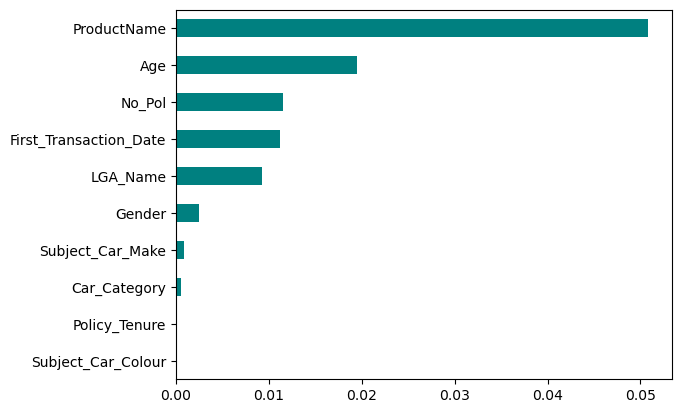

In [197]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importance = mutual_info_classif(x, y)
feat_importances = pd.Series(importance, index=x.columns)
feat_importances = feat_importances.sort_values(ascending=True)
feat_importances.plot(kind='barh', color='teal')
plt.show()

In [198]:
model = DecisionTreeClassifier()
model.fit(x, y)

DecisionTreeClassifier()

In [155]:
x

,Policy_Start_Date,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,ProductName,Policy_Tenure
0,-1.773520,-1.452120,-0.398773,-0.419106,0.564913,-0.807483,-1.455692,-1.014903,0.193843,15.370878
1,-1.764141,0.388786,-0.398773,-0.419106,0.564913,-0.807483,0.807125,-1.014903,-0.770700,13.670931
2,-1.754761,0.388786,-0.048105,0.945049,0.564913,-0.807483,0.807125,-0.489089,0.193843,11.970984
3,-1.745381,0.388786,0.442830,0.945049,0.564913,0.441989,-2.504314,-1.681789,0.193843,50.078134
4,-1.736002,-1.452120,0.162296,-0.419106,0.564913,0.441989,0.862316,-1.681789,-1.252971,8.712751
...,...,...,...,...,...,...,...,...,...,...
12074,1.743827,0.388786,0.723365,3.673359,0.564913,-0.807483,-1.455692,1.203777,-0.770700,-0.778621
12075,1.743827,0.388786,0.162296,-0.419106,-1.588089,1.483216,-1.290120,1.203777,-0.770700,0.071353
12076,1.743827,0.388786,-0.398773,-0.419106,-1.588089,1.483216,-1.290120,-1.476593,1.158385,0.071353
12077,1.743827,0.388786,-1.661177,-0.419106,0.564913,1.483216,-0.793404,-1.476593,1.158385,0.071353


In [200]:
ds_predictions = model.predict(x)

f1 = f1_score(y, ds_predictions)
precision = precision_score(y, ds_predictions)
recall = recall_score(y, ds_predictions)
conf_matrix = confusion_matrix(y, ds_predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.8676
Precision: 0.9751
Recall: 0.7814
Confusion Matrix:
[[10595    29]
 [  318  1137]]


In [99]:
test

,ID,Policy_Start_Date,Policy_End_Date,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,StartMonth,EndMonth,FirstMonth,StartDay,EndDay,FirstDay,Policy_Tenure
0,ID_6JEYVLP,0,0,1,21,2010-01-01,1,1,0,0,72,29,4,1,12,1,1,31,1,11
1,ID_BX1PNZ6,0,139,2,73,2010-01-01,7,1,0,10,72,29,4,1,5,1,1,31,1,16
2,ID_83NJU2D,0,0,1,28,2010-01-01,4,1,15,8,109,29,7,1,12,1,1,31,1,11
3,ID_Q6GKOAQ,1,1,0,32,2010-01-02,1,1,15,8,109,29,1,1,1,1,2,1,2,12
4,ID_WB3E64W,1,1,1,55,2010-01-02,1,6,0,33,109,29,4,1,1,1,2,1,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,ID_3VAANJU,313,318,0,28,2010-12-30,1,6,14,11,85,32,1,12,12,12,30,29,30,12
1198,ID_A1YSYCA,313,318,1,32,2010-12-30,1,6,14,11,85,32,4,12,12,12,30,29,30,12
1199,ID_X7F8710,314,319,1,24,2010-12-31,3,6,14,11,85,32,1,12,12,12,31,30,31,12
1200,ID_MZPS3W5,314,171,1,20,2010-12-31,1,10,0,33,92,6,1,12,7,12,31,10,31,7


In [201]:
sub_test = test.drop(columns=['ID','State','Policy_Start_Date','Policy_End_Date'])
sub_test

,Gender,Age,First_Transaction_Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,ProductName,Policy_Tenure
0,1,21,0,1,1,0,0,72,4,11
1,2,73,0,7,1,0,10,72,4,16
2,1,28,0,4,1,15,8,109,7,11
3,0,32,1,1,1,15,8,109,1,12
4,1,55,1,1,6,0,33,109,4,12
...,...,...,...,...,...,...,...,...,...,...
1197,0,28,313,1,6,14,11,85,1,12
1198,1,32,313,1,6,14,11,85,4,12
1199,1,24,314,3,6,14,11,85,1,12
1200,1,20,314,1,10,0,33,92,1,7


In [202]:
sub_test[numerical_columns] = scaler.fit_transform(sub_test[numerical_columns])

In [206]:
test_predictions = model.predict(sub_test)
pd.set_option('display.max_rows', 20)

pd.DataFrame(test_predictions).value_counts()

0
0    1093
1     109
Name: count, dtype: int64

In [210]:
submission = pd.DataFrame({
    'ID': test['ID'],
    'target': test_predictions
})

submission.to_csv('submission.csv', index=False)

In [50]:
import joblib

joblib.dump(model, './streamlit/model.pkl')

['./streamlit/model.pkl']

# Other models

Gradient Booster

In [17]:
import xgboost as xgb

model2 = xgb.XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model2.fit(x, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [18]:
gb_predictions = model2.predict(x)

f1 = f1_score(y, gb_predictions)
precision = precision_score(y, gb_predictions)
recall = recall_score(y, gb_predictions)
conf_matrix = confusion_matrix(y, gb_predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.2506
Precision: 0.8238
Recall: 0.1478
Confusion Matrix:
[[10578    46]
 [ 1240   215]]


In [20]:
gb_predictions = model2.predict(sub_test)
pd.set_option('display.max_rows', 20)

pd.DataFrame(gb_predictions).value_counts()

0
0    1202
Name: count, dtype: int64

Support Vector

In [21]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Combine scaling with SVM in a pipeline
model3 = make_pipeline(StandardScaler(), SVC(kernel="linear", C=1.0, random_state=42))
model3.fit(x, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(kernel='linear', random_state=42))])

In [22]:
sv_predictions = model3.predict(x)

f1 = f1_score(y, sv_predictions)
precision = precision_score(y, sv_predictions)
recall = recall_score(y, sv_predictions)
conf_matrix = confusion_matrix(y, sv_predictions)

print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print("Confusion Matrix:")
print(conf_matrix)

F1 Score: 0.0000
Precision: 0.0000
Recall: 0.0000
Confusion Matrix:
[[10624     0]
 [ 1455     0]]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [23]:
sv_predictions = model3.predict(sub_test)
pd.set_option('display.max_rows', 20)

pd.DataFrame(sv_predictions).value_counts()

0
0    1202
Name: count, dtype: int64

Exhaustive Feature Selector

In [ ]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score)

efs = ExhaustiveFeatureSelector(DecisionTreeClassifier(),
                                min_features=1,
                                max_features=5,
                                scoring=f1_scorer,
                                cv=2)

efs = efs.fit(x, y)

selected_features = train.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

Features: 16663/16663

Index(['Policy_Start_Date', 'Policy_End_Date', 'Age', 'No_Pol',
       'Subject_Car_Colour'],
      dtype='object')
0.25182430912574627


In [24]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from sklearn.metrics import f1_score, make_scorer

f1_scorer = make_scorer(f1_score)

efs = ExhaustiveFeatureSelector(model2,
                                min_features=1,
                                max_features=5,
                                scoring=f1_scorer,
                                cv=2)

efs = efs.fit(x, y)

selected_features = train.columns[list(efs.best_idx_)]
print(selected_features)

print(efs.best_score_)

KeyboardInterrupt: 